# Notebook for the course on automata theory

We start by importing the __vcsn__ API.

In [3]:
import vcsn

## Editing Automata and Basinc Operations

Our first running example in the slide deck. This is a simple example of FSA over the alphabet ${a,b, c}$.

_Remark:_ with the default options, states displayed in the graphical version of the FSA are indexed using the order 
in which they are used/declared.

In [15]:
aut = vcsn.automaton('''
context = lal_char(abc), b
$ -> 0
0 -> 1 a
1 -> 2 b
2 -> 1 a
2 -> 3 b
2 -> 1 b
2 -> $
3 -> 4 b
4 -> 3 a
4 -> 2 a
4 -> $ 
''')

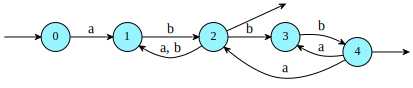

In [16]:
aut

There is an alternate way for defining the automaton that preserves the naming of states

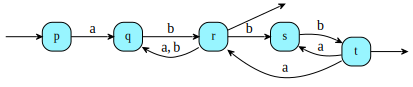

In [25]:
%%automaton a
context = "lal_char(abc), b"
$ -> p
p -> q a
q -> r b
r -> q a
r -> s b
r -> q b
r -> $
s -> t b
t -> s a
t -> r a
t -> $

Function _shortest_ returns the first few words accepted by the automaton (in lexicographic order).

In [17]:
aut.shortest(6)

ab + abab + abbb + abbba + ababab + ababbb

We can also use functions is\_ambiguous and ambiguous\_word to check if the FSA is ambiguous (and if yes to find an example of ambiguous word)

In [18]:
aut.is_ambiguous()

True

In [20]:
aut.ambiguous_word()

abbb

There is also function is\_deterministic to test whether the automaton is deterministic.

In [26]:
aut.is_deterministic()

False

We can use function _complete_ to compute a complete super-automaton. In this example we see the importance of specifying the alphabet of the automaton (since a symbol may be part of the alphabet but never appear in one of the transitions).

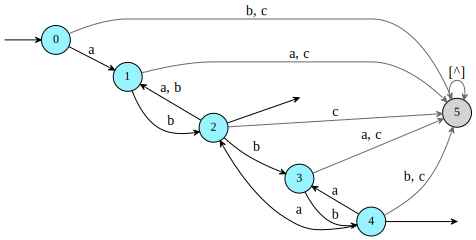

In [21]:
aut.complete()

## Caractériser ${\cal L}({\cal A})$

Next we display the two examples used to reason about the langugaes of FSA.

Our first examples is a NFA accepting words that finishes with the symbol $a$.

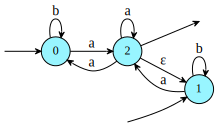

In [66]:
a = vcsn.automaton('''
context = lan(abc), b
$ -> p
$ -> r
p -> q a
p -> p b
q -> q a
q -> p a
q -> r \e
r -> r b
r -> q a
q -> $ 
''')
a

This is made clearer if we compute an equivalent, deterministic automaton.

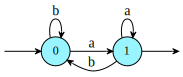

In [67]:
b = a.proper().determinize().minimize().strip()
b

Our second example is a DFA that accepts a binary representation of integers (with possible trailing zeros at the front).

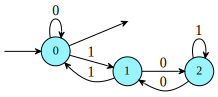

In [69]:
a = vcsn.automaton('''
context = lan(01), b
$ -> p
p -> $
p -> p 0
p -> q 1
q -> p 1
q -> r 0
r -> r 1
r -> q 0
''')
a

## Automates et modélisation

Next example is the NFA obtained from modelling a simple communication protocol.

The interpreation of each symbols is:

* 𝑏 : start of communication (begin)
* 𝑡 : sending a communication frame (trame)
* 𝑒 : end of transmission (end)
* 𝑐 : sending a frame with a correcting code
* 𝑠 : sending a control sum (end of _complex_ trasnmission_)


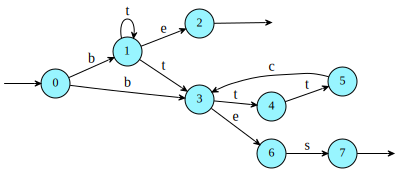

In [73]:
a = vcsn.automaton('''
context = lan(btecs), b
$ -> 0
0 -> 1 b
1 -> 1 t
1 -> 2 e
2 -> $
0 -> 3 b
3 -> 4 t
4 -> 5 t
5 -> 3 c
3 -> 6 e
6 -> 7 s
7 -> $
1 -> 3 t
''')
a

## Déterminization

We use this example to explain the basic determinization algorithms, often called _subset construction_, with the computation of the quotient/powerset automaton.

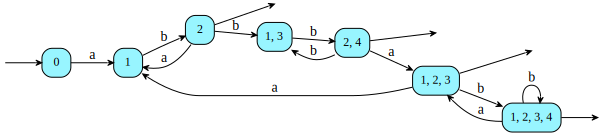

In [29]:
b = a.proper().determinize()
b

The labels on the states are the subset of states from $a$. You can get rid of these _decorations_ using function _strip_.

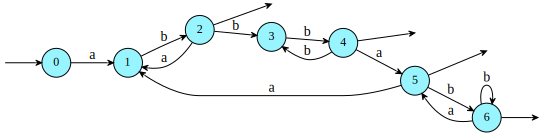

In [31]:
b.strip()

The following example is used to illustrate the removal of spontaneous, $\epsilon$-transitions. This operation can be perfomed using the function _proper_.

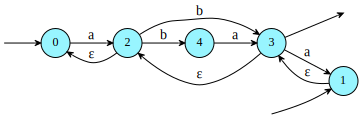

In [13]:
a = vcsn.automaton('''
context = lan(abc), b
$ -> 0
$ -> 1
0 -> 2 a
1 -> 3 \e
2 -> 0 \e
2 -> 3 b
2 -> 4 b
3 -> 1 a
3 -> 2 \e
4 -> 3 a
3 -> $ 
''')
a

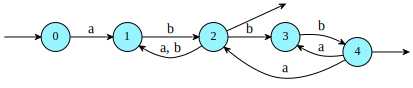

In [32]:
b = a.proper()
b

We can check that these two automata are equivalent; meaning that they accept the same language.

In [33]:
a.is_equivalent(b)

True

## Other Random Examples

We list here some extra FSA used in the slide deck.

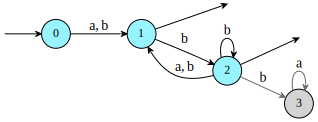

In [10]:
a = vcsn.automaton('''
context = lal_char(abc), b
$ -> 0
0 -> 1 a
0 -> 1 b
1 -> 2 b
1 -> $
2 -> 1 a
2 -> 2 b
2 -> 3 b
2 -> 1 b
2 -> $
3 -> 3 a
''')
a

VCSN comes equipped with some standard families of well-knwon/useful automata. We mentione the "de Bruijn" NFA in the section on determinization. This family of automata is close to be being a worst case for determinization.

You can look at the Ladybird family for a tighter bound.

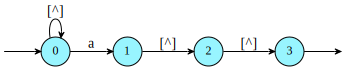

In [41]:
db = ctx.de_bruijn(2)
db

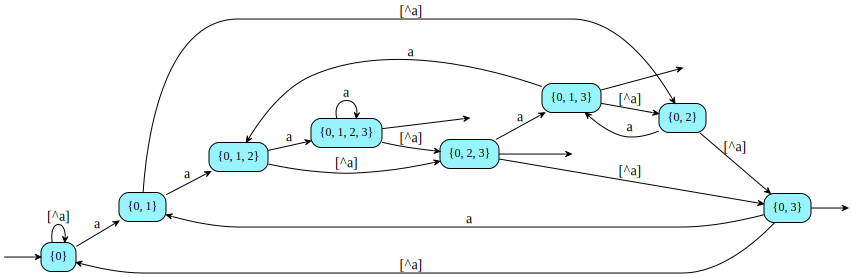

In [42]:
db.determinize().minimize()